## Задание: 
- Спрогнозировать относительную производительность компьютерного оборудования (ERP, integer);
- Рассмотреть минимум 3 модели, подобрать гиперпараметры минимум для двух моделей.

---

In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### Подготовка данных

In [409]:
data = pd.read_csv('computer_hardware_dataset.csv')
data.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [410]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   model_name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [411]:
data.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [412]:
# уберем название модели, чтобы ошибочно не считать это за признак
del data['model_name']

In [413]:
# конвертим наименование производителей в цифры
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
labelEncoder.fit(data['vendor_name'])
data['vendor_name'] = labelEncoder.transform(data['vendor_name'])

### Влияние признаков на целевой показатель
Построим диаграммы рассеивания наиболее значимых признаков для определения зависимостей

In [414]:
# таблица корреляций
data.corr().round(2)

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
vendor_name,1.00,-0.08,-0.08,0.01,0.01,0.04,-0.01,-0.02,-0.02
MYCT,-0.08,1.00,-0.34,-0.38,-0.32,-0.30,-0.25,-0.31,-0.29
MMIN,-0.08,-0.34,1.00,0.76,0.53,0.52,0.27,0.79,0.82
MMAX,0.01,-0.38,0.76,1.00,0.54,0.56,0.53,0.86,0.90
CACH,0.01,-0.32,0.53,0.54,1.00,0.58,0.49,0.66,0.65
CHMIN,0.04,-0.30,0.52,0.56,0.58,1.00,0.55,0.61,0.61
CHMAX,-0.01,-0.25,0.27,0.53,0.49,0.55,1.00,0.61,0.59
PRP,-0.02,-0.31,0.79,0.86,0.66,0.61,0.61,1.00,0.97
ERP,-0.02,-0.29,0.82,0.90,0.65,0.61,0.59,0.97,1.00


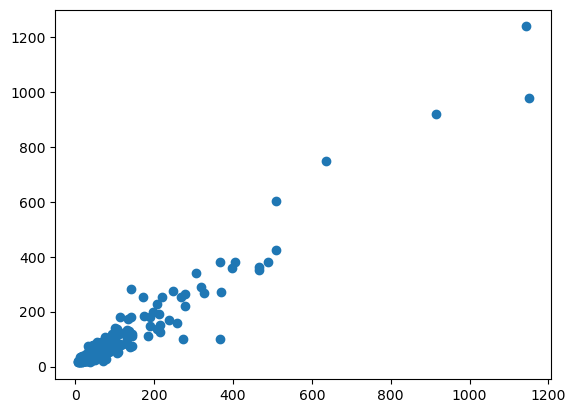

In [415]:
plt.scatter(data['PRP'], data['ERP'])

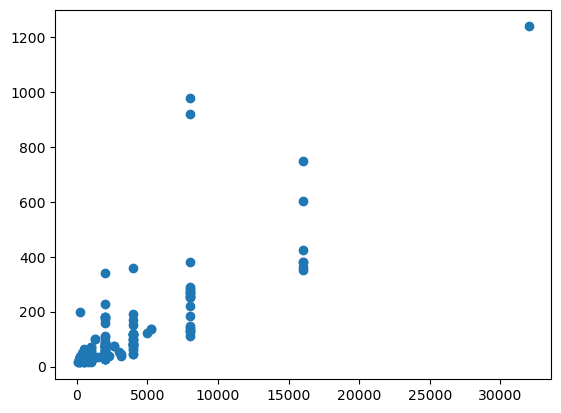

In [416]:
plt.scatter(data['MMIN'], data['ERP'])

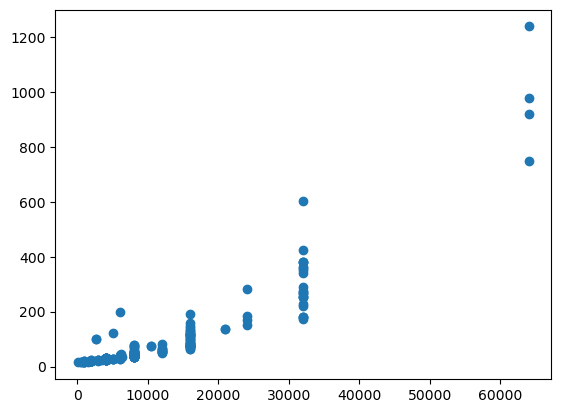

In [417]:
plt.scatter(data['MMAX'], data['ERP'])

Наблюдаем линейную зависимость. Высокая кореляция у столбцов `MMIN`, `MMAX`, `PRP`.

In [418]:
from sklearn.model_selection import train_test_split

x = data[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']]
y = data['ERP']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

### Linear Regression

In [419]:
from sklearn.linear_model import LinearRegression
 
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

In [420]:
print(linearModel.score(x_test, y_test))

0.8118109597742065


### Lasso Lars Regression

In [421]:
from sklearn.linear_model import LassoLars

lassoLarsRegression = LassoLars()
params = {'alpha': (np.logspace(-8, 8, 100))} 
lassoLarsModel = GridSearchCV(lassoLarsRegression, params, cv = 10)
lassoLarsModel.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LassoLars(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-...
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [422]:
print("Best params: ", lassoLarsModel.best_params_)

Best params:  {'alpha': 16.297508346206467}


In [423]:
lassoLarsRegression = LassoLars(alpha = 16.297508346206467)
lassoLarsRegression.fit(x_train, y_train)
print(lassoLarsRegression.score(x_test, y_test))

0.8153299658217268


### Ridge Regression

In [424]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridgeRegression = Ridge()
params = [
    {'alpha':[0.1, 1, 10, 100], 'solver':['svd']},
    {'alpha':[0.1, 1, 10, 100], 'solver':['auto']}, 
    {'alpha':[0.1, 1, 10, 100], 'solver':['lsqr']},
    {'alpha':[0.1, 1, 10, 100], 'solver':['cholesky']},
    {'alpha':[0.1, 1, 10, 100], 'solver':['sparse_cg']}
]

ridgeModel = GridSearchCV(ridgeRegression, params, scoring='neg_mean_squared_error', cv=5)
ridgeModel.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.1, 1, 10, 100], 'solver': ['svd']},
                         {'alpha': [0.1, 1, 10, 100], 'solver': ['auto']},
                         {'alpha': [0.1, 1, 10, 100], 'solver': ['lsqr']},
                         {'alpha': [0.1, 1, 10, 100], 'solver': ['cholesky']},
                         {'alpha': [0.1, 1, 10, 100], 'solver': ['sparse_cg']}],
             scoring='neg_mean_squared_error')

In [425]:
print("Best params: ", ridgeModel.best_params_)

Best params:  {'alpha': 100, 'solver': 'sparse_cg'}


In [426]:
ridgeRegression = Ridge(alpha = 100, solver = 'sparse_cg')
ridgeRegression.fit(x_train, y_train)
print(ridgeRegression.score(x_test, y_test))

0.8117122823422602


### Regression Metrics

In [427]:
from sklearn import metrics

linearPredicted = linearModel.predict(x_test)
lassoLarsPredicted = lassoLarsModel.predict(x_test)
ridgePredicted = ridgeModel.predict(x_test)

#### MAE

In [428]:
print('Linear:', np.round(metrics.mean_absolute_error(y_test, linearPredicted), 2))
print('Lasso Lars:', np.round(metrics.mean_absolute_error(y_test, lassoLarsPredicted), 2))
print('Ridge:', np.round(metrics.mean_absolute_error(y_test, ridgePredicted), 2))

Linear: 22.53
Lasso Lars: 22.45
Ridge: 22.44


#### RMSE

In [429]:
print('Linear:', np.sqrt(metrics.mean_squared_error(y_test, linearPredicted)))
print('Lasso Lars:', np.sqrt(metrics.mean_squared_error(y_test, lassoLarsPredicted)))
print('Ridge:', np.sqrt(metrics.mean_squared_error(y_test, ridgePredicted)))

Linear: 35.28028525804552
Lasso Lars: 34.948870062789645
Ridge: 35.289533702314266
